#Remove Duplicates

In [81]:
import pandas as pd
from IPython.display import display

# File input hanya reviews_filtered.xlsx
input_file = "reviews_filtered.xlsx"

# Cek apakah file ada
import os
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File '{input_file}' tidak ditemukan di working directory.")

# Baca file
data = pd.read_excel(input_file)
print(f"Membaca file: {input_file}")
print("Kolom yang tersedia:", list(data.columns))

# Pastikan kolom 'filtered' ada
if 'filtered' not in data.columns:
    raise KeyError("Kolom 'filtered' tidak ditemukan. Pastikan file 'reviews_filtered.xlsx' berisi kolom hasil filtering.")

# Hapus duplikat berdasarkan kolom 'filtered' (opsional)
before = len(data)
data['__filtered_key'] = data['filtered'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
data = data.drop_duplicates(subset=['__filtered_key']).drop(columns=['__filtered_key'])
after = len(data)

print(f"Duplikat terhapus: {before - after} baris\n")
print("Berikut 20 data setelah duplikat dihapus:")

# Simpan hasil ke Excel (opsional)
output_file = "reviews_filtered_no_duplicates.xlsx"
data.to_excel(output_file, index=False, engine='openpyxl')
print(f"\nFile '{output_file}' berhasil disimpan!")

# Tampilkan 20 data pertama
display(data.head(20))


Membaca file: reviews_filtered.xlsx
Kolom yang tersedia: ['filtered']
Duplikat terhapus: 41 baris

Berikut 20 data setelah duplikat dihapus:

File 'reviews_filtered_no_duplicates.xlsx' berhasil disimpan!


,filtered
0,"['makan', 'laut', 'segar', 'harga', 'jangkau',..."
1,"['langsung', 'sambut', 'ramah', 'megah']"
2,"['salah', 'makan', 'makan', 'laut', 'putar', '..."
3,"['lokasi', 'strategis', 'parkir', 'mobil', 'te..."
4,['enak']
5,"['enak', 'lumayan', 'murah', 'porsi', 'hitung'..."
6,"['riak', 'kakak', 'pribadi', 'senang']"
7,"['layan', 'ramah', 'bakar', 'gugah', 'bikin', ..."
8,"['menu', 'makan', 'laut', 'istimewa', 'istimew..."
9,"['layan', 'bagus']"


#Bigram

In [82]:
import ast
from nltk import bigrams
from google.colab import files

# Pastikan kolom 'filtered' berupa list, bukan string
data['filtered'] = data['filtered'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x
)

# Buat kolom baru 'bigram'
data['bigram'] = data['filtered'].apply(lambda tokens: [' '.join(b) for b in bigrams(tokens)])

print("Bigram Extraction selesai! Berikut 20 hasil pertama:")
display(data[['filtered', 'bigram']].head(20))

# Simpan hasil ke Excel
data.to_excel("reviews_bigram.xlsx", index=False, engine='openpyxl')
print("\nFile 'reviews_bigram.xlsx' berhasil disimpan!")

# Unduh hasil (opsional)
# files.download("reviews_bigram.xlsx")


Bigram Extraction selesai! Berikut 20 hasil pertama:


,filtered,bigram
0,"[makan, laut, segar, harga, jangkau, cocok, ke...","[makan laut, laut segar, segar harga, harga ja..."
1,"[langsung, sambut, ramah, megah]","[langsung sambut, sambut ramah, ramah megah]"
2,"[salah, makan, makan, laut, putar, gurame, bak...","[salah makan, makan makan, makan laut, laut pu..."
3,"[lokasi, strategis, parkir, mobil, tepi, jalan...","[lokasi strategis, strategis parkir, parkir mo..."
4,[enak],[]
5,"[enak, lumayan, murah, porsi, hitung, cepat, k...","[enak lumayan, lumayan murah, murah porsi, por..."
6,"[riak, kakak, pribadi, senang]","[riak kakak, kakak pribadi, pribadi senang]"
7,"[layan, ramah, bakar, gugah, bikin, mampir, ma...","[layan ramah, ramah bakar, bakar gugah, gugah ..."
8,"[menu, makan, laut, istimewa, istimewa, harga,...","[menu makan, makan laut, laut istimewa, istime..."
9,"[layan, bagus]",[layan bagus]



File 'reviews_bigram.xlsx' berhasil disimpan!


#Trigram

In [83]:
import ast
from nltk import trigrams
from google.colab import files

# Pastikan kolom 'filtered' adalah list, bukan string
data['filtered'] = data['filtered'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x
)

# Buat kolom baru 'trigram'
data['trigram'] = data['filtered'].apply(lambda tokens: [' '.join(t) for t in trigrams(tokens)])

print("Trigram Extraction selesai! Berikut 20 hasil pertama:")
display(data[['filtered', 'trigram']].head(20))

# Simpan hasil ke Excel
data.to_excel("reviews_trigram.xlsx", index=False, engine='openpyxl')
print("\nFile 'reviews_trigram.xlsx' berhasil disimpan!")


Trigram Extraction selesai! Berikut 20 hasil pertama:


,filtered,trigram
0,"[makan, laut, segar, harga, jangkau, cocok, ke...","[makan laut segar, laut segar harga, segar har..."
1,"[langsung, sambut, ramah, megah]","[langsung sambut ramah, sambut ramah megah]"
2,"[salah, makan, makan, laut, putar, gurame, bak...","[salah makan makan, makan makan laut, makan la..."
3,"[lokasi, strategis, parkir, mobil, tepi, jalan...","[lokasi strategis parkir, strategis parkir mob..."
4,[enak],[]
5,"[enak, lumayan, murah, porsi, hitung, cepat, k...","[enak lumayan murah, lumayan murah porsi, mura..."
6,"[riak, kakak, pribadi, senang]","[riak kakak pribadi, kakak pribadi senang]"
7,"[layan, ramah, bakar, gugah, bikin, mampir, ma...","[layan ramah bakar, ramah bakar gugah, bakar g..."
8,"[menu, makan, laut, istimewa, istimewa, harga,...","[menu makan laut, makan laut istimewa, laut is..."
9,"[layan, bagus]",[]



File 'reviews_trigram.xlsx' berhasil disimpan!


#WordCloud

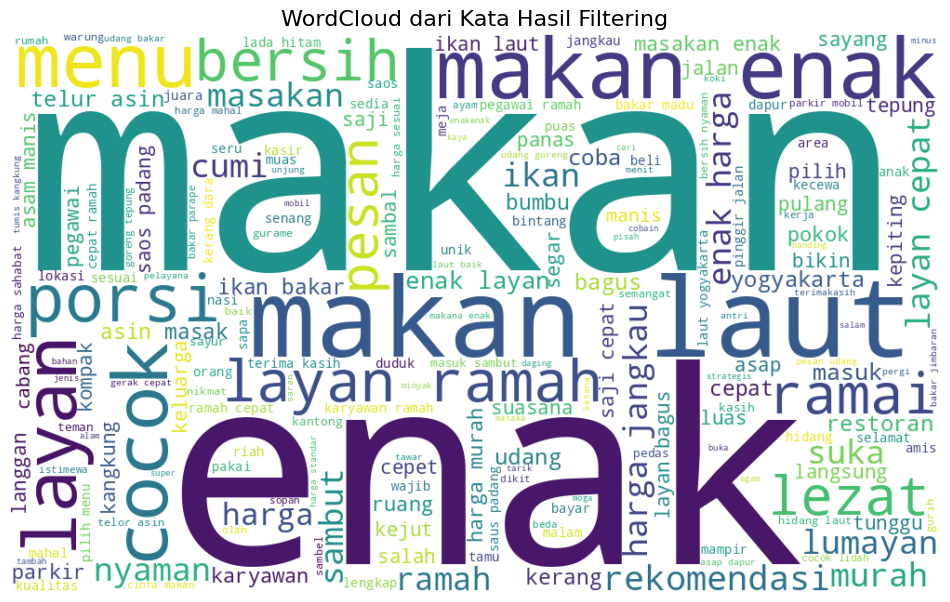


WordCloud berhasil ditampilkan dan file 'reviews_wordcloud_source.xlsx' disimpan!


In [85]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files

# Gabungkan semua kata hasil filtering
all_words = ' '.join([' '.join(tokens) for tokens in data['filtered']])

# Buat wordcloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_words)

# Tampilkan
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud dari Kata Hasil Filtering", fontsize=16)
plt.show()

# (Opsional) Simpan teks hasil akhir biar bisa diunduh juga
data.to_excel("reviews_wordcloud_source.xlsx", index=False, engine='openpyxl')
print("\nWordCloud berhasil ditampilkan dan file 'reviews_wordcloud_source.xlsx' disimpan!")

# Unduh hasil (opsional)
# files.download("reviews_wordcloud_source.xlsx")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Unduh Output Dalam EXcel

In [ ]:
import pandas as pd
import glob

# Ambil semua file hasil preprocessing
files = sorted(glob.glob("reviews_*.xlsx"))
print("File ditemukan:", files)

# Gabungkan ke satu file Excel
with pd.ExcelWriter("Remove_Bigram_Trigram_wordcloud.xlsx", engine="openpyxl") as writer:
    for file in files:
        df = pd.read_excel(file)
        sheet_name = file.replace("reviews_", "").replace(".xlsx", "")
        df.to_excel(writer, sheet_name=sheet_name[:31], index=False)

print("Semua file berhasil digabung jadi 'Remove_Bigram_Trigram_wordcloud.xlsx'!")


File ditemukan: ['reviews_bigram.xlsx', 'reviews_filtered.xlsx', 'reviews_removed_duplicates.xlsx', 'reviews_trigram.xlsx', 'reviews_wordcloud_source.xlsx']
Semua file berhasil digabung jadi 'Remove_Bigram_Trigram_wordcloud.xlsx'!
